In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

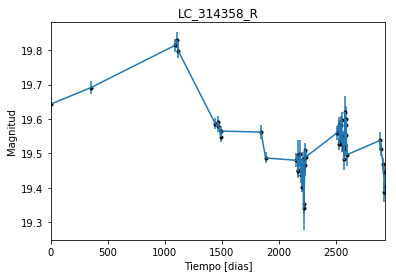

In [2]:
data = np.genfromtxt('LC_314358_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_314358_R')
plt.savefig("LC_314358_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

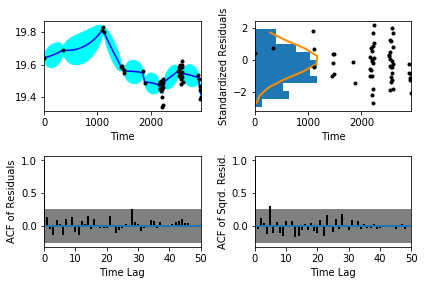

In [5]:
sample.assess_fit()

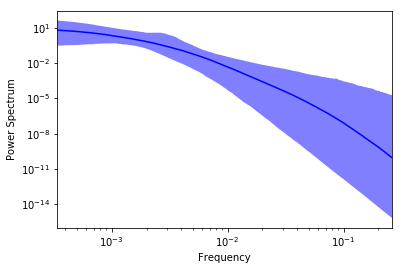

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

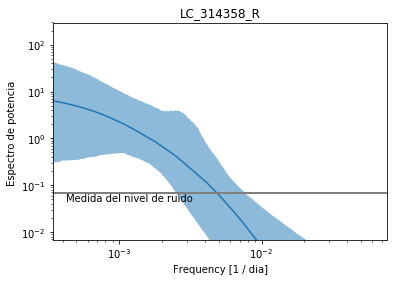

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_314358_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_314358_R')

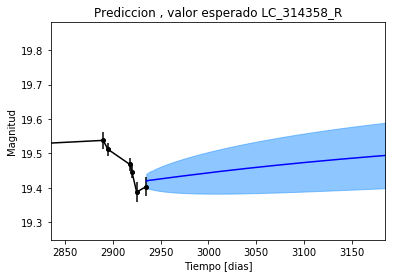

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_314358_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_314358_R')

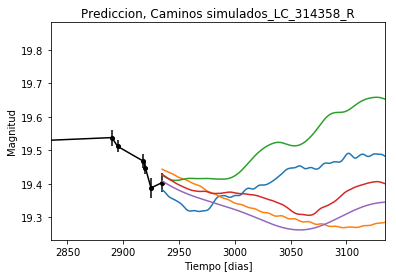

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_314358_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


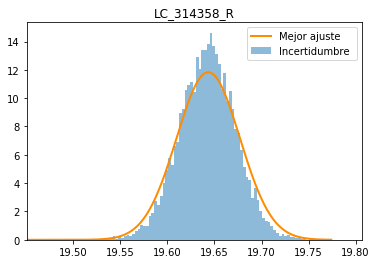

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_314358_R')
plt.savefig("Mejor_ajuste_LC_314358_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_314358_R')

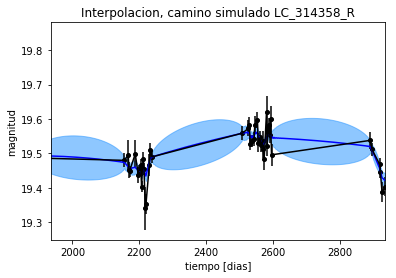

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_R')

Text(0.5,1,'Interpolacion, camino simulado LC_314358_R')

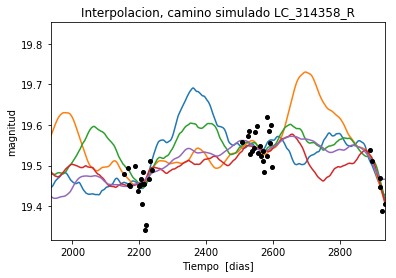

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 521.504080404
Median: 0.0100422176301
Standard deviation: 0.104246071432
68% credibility interval: [ 0.00101365  0.12260435]
95% credibility interval: [ 0.00040567  0.39952938]
99% credibility interval: [  3.56558259e-04   4.90667448e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 730.994599313
Median: 0.00252926976343
Standard deviation: 0.048313080388
68% credibility interval: [ 0.00055186  0.02283576]
95% credibility interval: [ 0.00036823  0.1650992 ]
99% credibility interval: [ 0.00034517  0.33547767]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1242.66039709
Median: 0.0144047801834
Standard deviation: 0.11359730

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1857.31026341
Median: 116.978320652
Standard deviation: 1.64225136622
68% credibility interval: [ 115.14918057  118.24130286]
95% credibility interval: [ 112.72663978  118.99495675]
99% credibility interval: [ 110.90773592  119.32846818]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 468.033848837
Median: 0.435216417993
Standard deviation: 1.16804487581
68% credibility interval: [ 0.0604449   2.15204983]
95% credibility interval: [ 0.01721707  3.99467108]
99% credibility interval: [ 0.01049843  5.53532491]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 501.461538917
Median: 0.21297666765
Standard deviation: 2.42236575501
68% credibility interval: [ 0.01004892  2.71486132]
95% credibility interval: [  9.60658578e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1517.05487913
Median: 4.85870885212e-27
Standard deviation: 2.9272287741e+69
68% credibility interval: [  5.80092347e-55   3.87891258e-07]
95% credibility interval: [  6.13889135e-123   5.39609850e+012]
99% credibility interval: [  4.96854348e-166   2.44353814e+039]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2834.06180851
Median: 19.5931639291
Standard deviation: 0.0693885095059
68% credibility interval: [ 19.53795996  19.64891965]
95% credibility interval: [ 19.45013222  19.72188189]
99% credibility interval: [ 19.34700271  19.79574712]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 336.774228576
Median: 0.00721630258266
Standard deviation: 0.125419109391
68% credibility interval: [ 0.          0.20297873]
95% credibility interval: [ 0.          0.44020403]
99% credibility interval: [ 0.          0.50816747]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 336.774228576
Median: 0.00721630258266
Standard deviation: 0.125419109391
68% credibility interval: [ 0.          0.20297873]
95% credibility interval: [ 0.          0.44020403]
99% credibility interval: [ 0.          0.50816747]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 668.058825435
Median: 0.0
Standard deviation: 0.000745992307373
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1857.31026341
Median: 116.978320652
Standard deviation: 1.64225136622
68% credibility interval: [ 115.14918057  118.24130286]
95% credibility interval: [ 112.72663978  118.99495675]
99% credibility interval: [ 110.90773592  119.32846818]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2673.73512994
Median: 0.016528629067
Standard deviation: 0.0240937596798
68% credibility interval: [ 0.00966755  0.03234583]
95% credibility interval: [ 0.00638289  0.07831168]
99% credibility interval: [ 0.00500439  0.15381505]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1907.26092792
Median: 1.34656589745
Standard deviation: 0.22413118943
68% credibility interval: [ 1.13819177  1.58801347]
95% credibility interval: [ 0.96667358  1.85084963]
99% credibility interval: [ 0.84952347  1.95343941]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 697.107613621
Median: 6.10507128595e-05
Standard deviation: 0.0139240642482
68% credibility interval: [  1.34363423e-06   1.63618148e-03]
95% credibility interval: [  5.31544074e-17   2.80290720e-02]
99% credibility interval: [  6.92076467e-43   9.91189559e-02]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 521.504080404
Median: (-0.063097114265+0j)
Standard deviation: 1.02470250656
68% credibility interval: [-0.77034587+0.j         -0.00636894-0.07936125j]
95% credibility interval: [-2.51031713+0.j         -0.00254890-0.04770106j]
99% credibility interval: [ -3.08295450e+00+0.j          -2.24032162e-03-1.03934852j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 730.994599313
Median: (-0.0158918706155+0.737539441305j)
Standard deviation: 0.844477560041
68% credibility interval: [-0.14348130+0.07057915j -0.00346744+0.66046377j]
95% credibility interval: [-1.03734888+1.07631858j -0.00231367+0.j        ]
99% credibility interval: [-2.10786836+2.56156194j -0.00216877+0.j        ]
Posterior summary for parameter ar_roots  ele